# cluster_loss

In [614]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pdb

In [640]:
#in-ood
DATE = {"clinc": 86.18, "stackoverflow": 72.22, "hwu": 64.54,"banking": 66.27}
unbert = {"clinc": 84.42, "stackoverflow": 65.76, "hwu": 67.8,"banking": 54.23}
gt = {"clinc": 97.82, "stackoverflow": 91.88, "hwu": 86.6,"banking": 80.3}

In [580]:
#out-ood
DATE = {"clinc": 96.99, "stackoverflow": 94.84, "hwu": 92.29,"banking": 97.52}
unbert = {"clinc": 99.87, "stackoverflow": 99.84, "hwu": 98.44,"banking": 98.62}
gt = {"clinc": 99.62, "stackoverflow": 99.66, "hwu": 98.76,"banking": 99.56}

In [616]:
def plot_k(df, hue = 'model', comparision = True):
    plt.figure(figsize=(25, 15))
    plt.rcParams['axes.titlepad'] = 50
    graph = sns.lineplot(data=df, x ='cluster_num', y = "AUROC", linewidth=7, hue= hue)
    if comparision :
        graph.axhline(gt[data_name], linewidth =3, c = "green",label = "Supervised")
        graph.axhline(DATE[data_name], linewidth =3, c = "red",label = "DATE")
        graph.axhline(unbert[data_name], linewidth =3, c = "Black",label = "xu et al")
    plt.legend(fontsize=40)
    plt.title("Sensitivity of K", fontsize = 70)
    plt.xticks(fontsize = 40, rotation = 70)
    plt.yticks(fontsize = 50)
    plt.ylabel("AUROC",fontsize = 70)
    plt.xlabel("Cluster #k",fontsize = 70)
    plt.show()

In [617]:
# DATE = {"comp":[0.9021642360589988] * 20,
#         "rec":[0.9189276009059476] * 20,
#         "sci":[0.8085549890635484] * 20,
#         "misc":[0.86] * 20,
#         "pol":[0.819] * 20,
#         "rel":[0.861] * 20,
#        "k": [i for i in range(1,21)]}

In [618]:
name = ['clinc', 'banking', 'hwu', 'stackoverflow', 'sup']

In [632]:
data_name = name[4]

In [633]:
df = pd.read_csv(data_name + "/result.csv")

In [634]:
df['model'] = df['classifier_epochs'].apply(lambda x: 'Ours(+PLL)' if x== 1 else 'Ours')

In [635]:
df_ = df[(df['cluster_type'] == "SCCL") ]

In [623]:
# df_ = df[(df['classifier_epochs'] == 1)]

In [624]:
# df_ = df_[~df_["score_func"].str.contains("ood")]

In [610]:
df_ = df_[df_["score_func"].str.contains("maha_ood")]

In [636]:
df_['AUROC'] = df_['AUROC'] * 100

/tmp/ipykernel_27322/2556564211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['AUROC'] = df_['AUROC'] * 100


In [637]:
df_

,Unnamed: 0,Date,time,score_func,Dataset,cluster_type,cluster_epochs,cluster_lr,classifier_epochs,cluster_num,Normal_class,AUROC,AUIN,AUOUT,DTACC,cluster_acc,pooling,model
48,NaN,2022-6-27,15-34-54,energy,clinc,SCCL,0,0.000003,1,150,0,10.521111,0.645062,0.100962,0.500000,0.535533,mean,Ours(+PLL)
49,NaN,2022-6-27,15-34-54,energy_ood,clinc,SCCL,0,0.000003,1,150,0,1.848722,0.478253,0.173114,0.500000,0.535533,mean,Ours(+PLL)
50,NaN,2022-6-27,15-34-54,maha,clinc,SCCL,0,0.000003,1,150,0,95.789222,0.989037,0.875476,0.891667,0.535533,mean,Ours(+PLL)
51,NaN,2022-6-27,15-34-54,maha_ood,clinc,SCCL,0,0.000003,1,150,0,99.703144,0.998570,0.993492,0.973194,0.535533,mean,Ours(+PLL)
52,NaN,2022-6-27,15-34-54,msp,clinc,SCCL,0,0.000003,1,150,0,12.556133,0.651311,0.102342,0.500000,0.535533,mean,Ours(+PLL)
53,NaN,2022-6-27,15-34-54,msp_ood,clinc,SCCL,0,0.000003,1,150,0,3.722344,0.481143,0.174118,0.500000,0.535533,mean,Ours(+PLL)
54,NaN,2022-6-27,15-47-12,energy,banking,SCCL,0,0.000003,1,50,1,40.429537,0.587437,0.285366,0.500000,0.209145,mean,Ours(+PLL)
55,NaN,2022-6-27,15-47-12,energy_ood,banking,SCCL,0,0.000003,1,50,1,12.182500,0.474537,0.199717,0.500000,0.209145,mean,Ours(+PLL)
56,NaN,2022-6-27,15-47-12,maha,banking,SCCL,0,0.000003,1,50,1,66.811852,0.771519,0.536770,0.618861,0.209145,mean,Ours(+PLL)
57,NaN,2022-6-27,15-47-12,maha_ood,banking,SCCL,0,0.000003,1,50,1,98.135800,0.988800,0.971047,0.940750,0.209145,mean,Ours(+PLL)


In [638]:
df_['model'].unique()

array(['Ours(+PLL)'], dtype=object)

KeyError: 'sup'

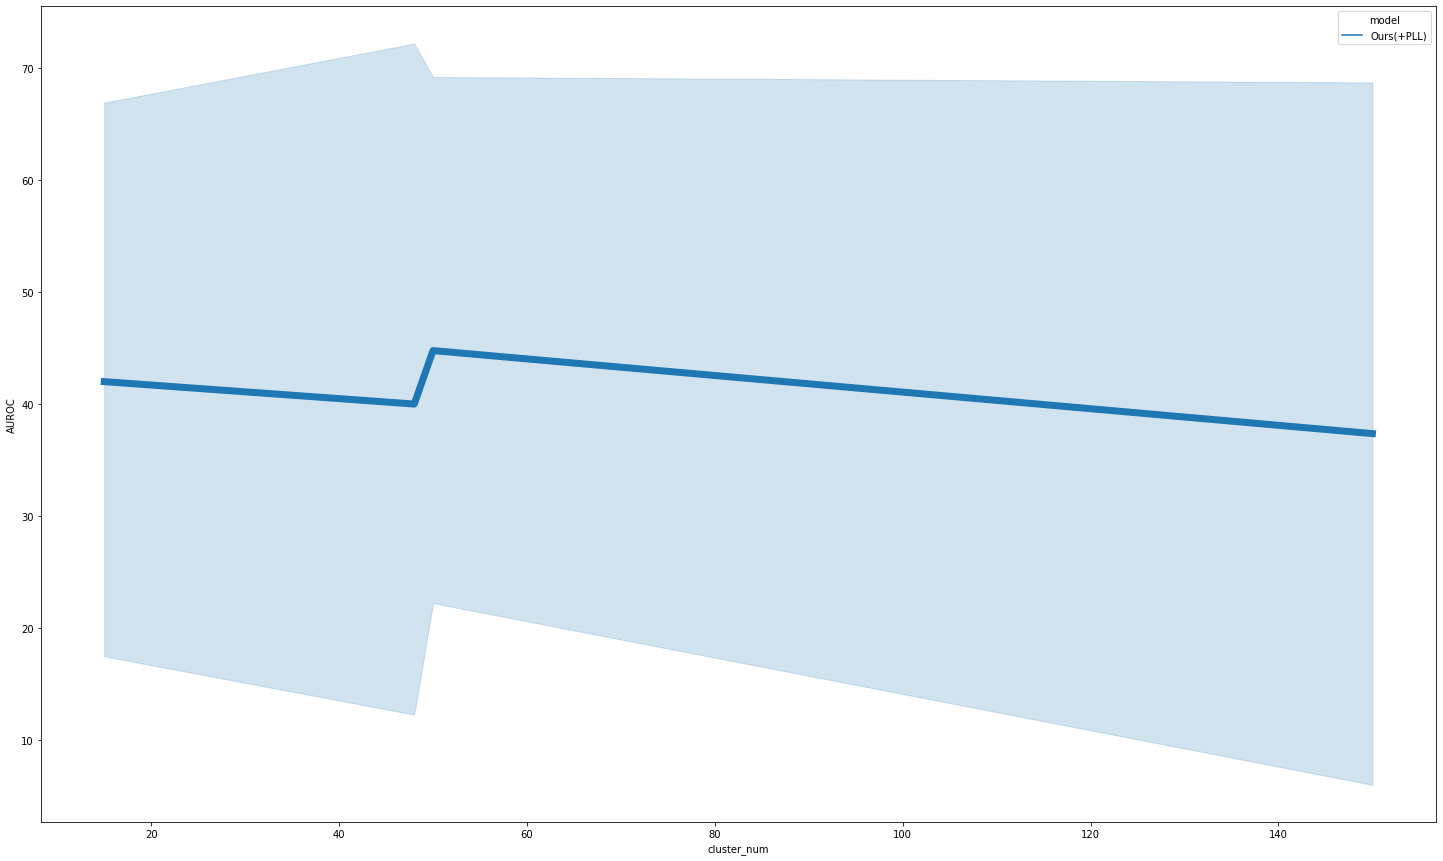

In [639]:
plot_k(df_, hue = "model" ,comparision= True)

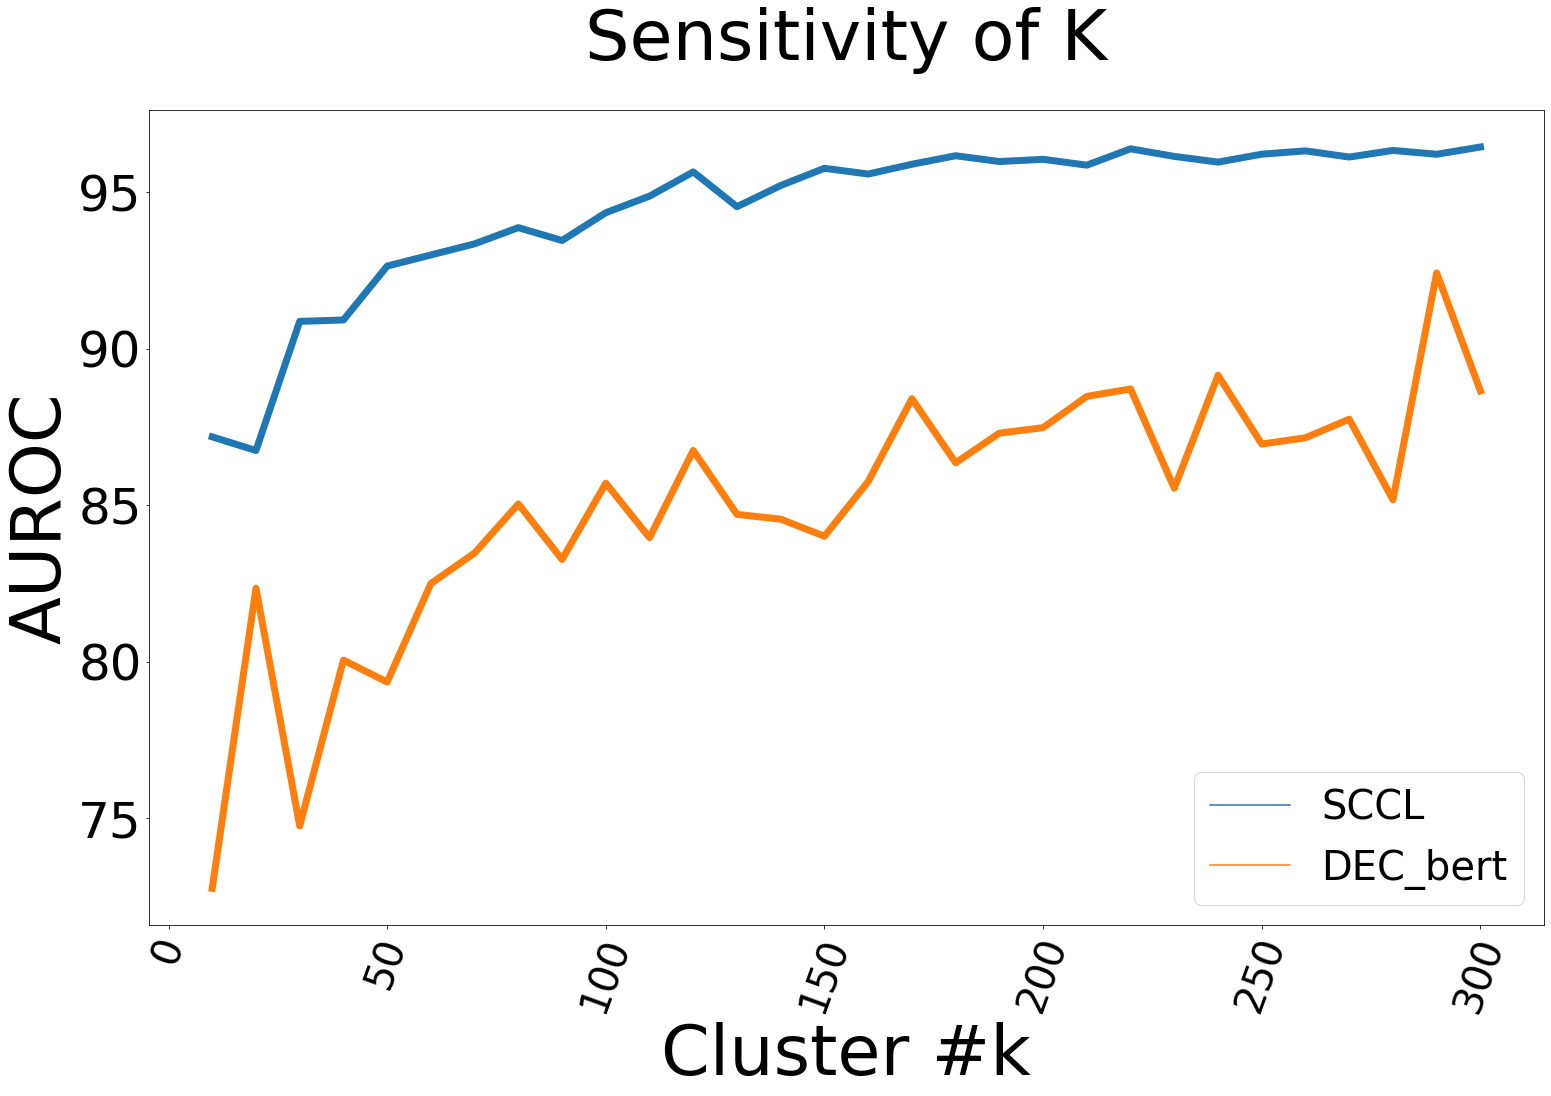

In [570]:
plot_k(df_, hue = "cluster_type" ,comparision= False)

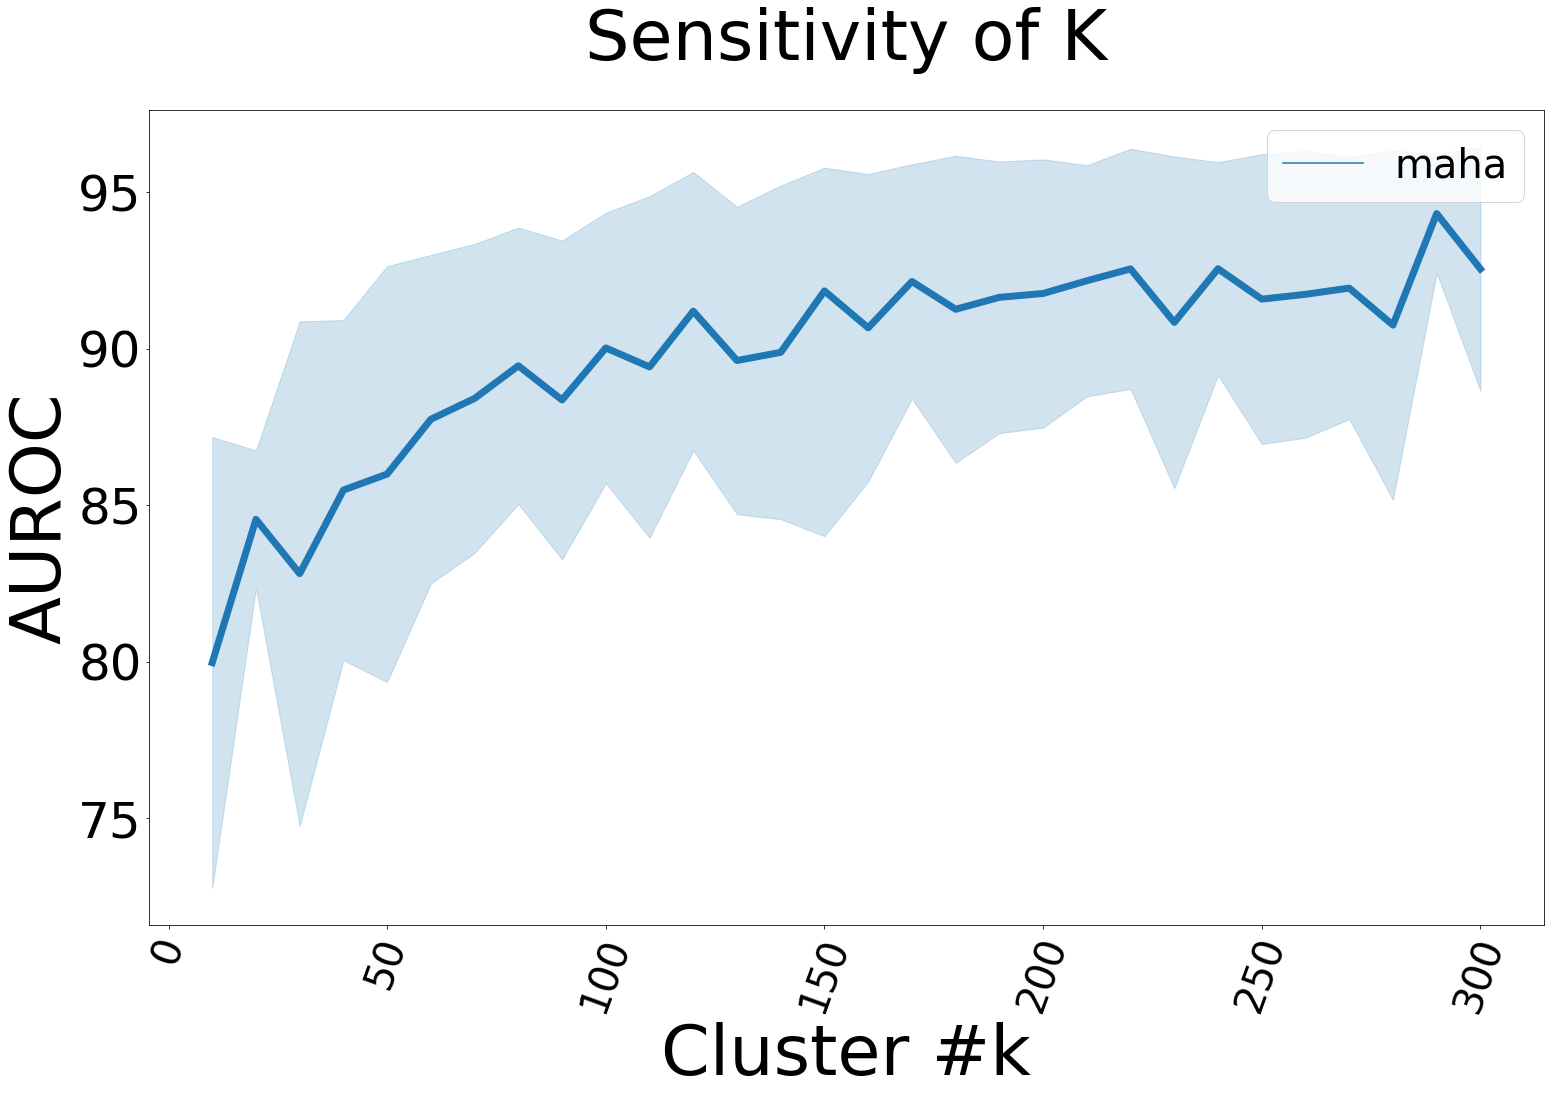

In [569]:
plot_k(df_, hue = "score_func" ,comparision= False)

# 임베딩 시각화

In [370]:
from sklearn.covariance import ledoit_wolf
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.metrics import roc_curve, auc

In [371]:
import os
cwd = os.getcwd()

In [474]:
df= df_[df_['Dataset'] == 'stackoverflow']

In [475]:
df.iloc[-1]

Unnamed: 0                     NaN
Date                     2022-6-23
time                      23-28-36
score_func                 msp_ood
Dataset              stackoverflow
cluster_type              DEC_bert
cluster_epochs                   0
cluster_lr                0.000003
classifier_epochs                1
cluster_num                     15
Normal_class                     0
AUROC                     0.020074
AUIN                      0.477745
AUOUT                      0.17359
DTACC                          0.5
cluster_acc                    1.0
pooling                       mean
Name: 17, dtype: object

In [476]:
path = cwd +  "/../log/" + df['Date'].iloc[-1]+ "/" + df["time"].iloc[-1]

In [477]:
after = {}

In [478]:
after["train_emb_a"] = np.load(path + "/train_embed.txt.npy")
after["in_emb_a"] = np.load(path + "/in_embed.txt.npy")
after["out_emb_a"] = np.load(path + "/out_embed.txt.npy")
after["ood_emb_a"] = np.load(path + "/ood_embed.txt.npy")
labels = np.load(path+ "/y_pred.txt.npy")

Using ledoit-wolf covariance estimator.
0.9248146666666667


<AxesSubplot:title={'center':'Score Distribution'}, xlabel='score', ylabel='Count'>

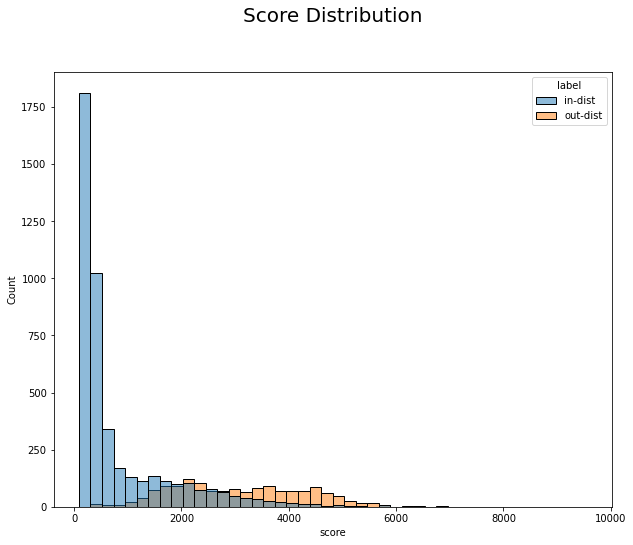

In [479]:
din, dood, dtrain = get_scores_multi_cluster(after["train_emb_a"],after["in_emb_a"],after["out_emb_a"],labels,'lw')
score_one = np.append(din,dood)
n = [0 for i in range(len(din))]
N = [1 for i in range(len(dood))]
#n.extend(num)
n.extend(N)
fpr, tpr, thresholds=roc_curve(n, -score_one, pos_label=0)                       
auroc_one = auc(fpr,tpr)

print(auroc_one)

plt.figure(figsize=(10, 8))
plt.title("Score Distribution",fontsize=20)
n = ["in-dist" for i in range(len(din))]
N = ["out-dist" for i in range(len(dood))]
#n.extend(num)
n.extend(N)
data = {'score': score_one, "label": n}
sns.histplot(data = data, x= "score", hue= 'label')


In [480]:
feature_ = np.concatenate([after["train_emb_a"],after["in_emb_a"],after["out_emb_a"],after["ood_emb_a"]])
model = TSNE(n_components = 2, perplexity = 40)
embed = pd.DataFrame(model.fit_transform(feature_), columns=['x', 'y'])

In [481]:
# train = [i for i in labels]
# n = ["in-dist" for i in range(len(din))]
# N = ["out-dist" for i in range(len(dood))]
# embed['label_gt'] = train + n + N

In [482]:
train = ["train" for i in range(len(after["train_emb_a"]))]
n = ["Normal" for i in range(len(after["in_emb_a"]))]
N = ["in-ood" for i in range(len(after["out_emb_a"]))]
nn = ["out-ood" for i in range(len(after["ood_emb_a"]))]
embed['label_gt'] = train + n + N + nn

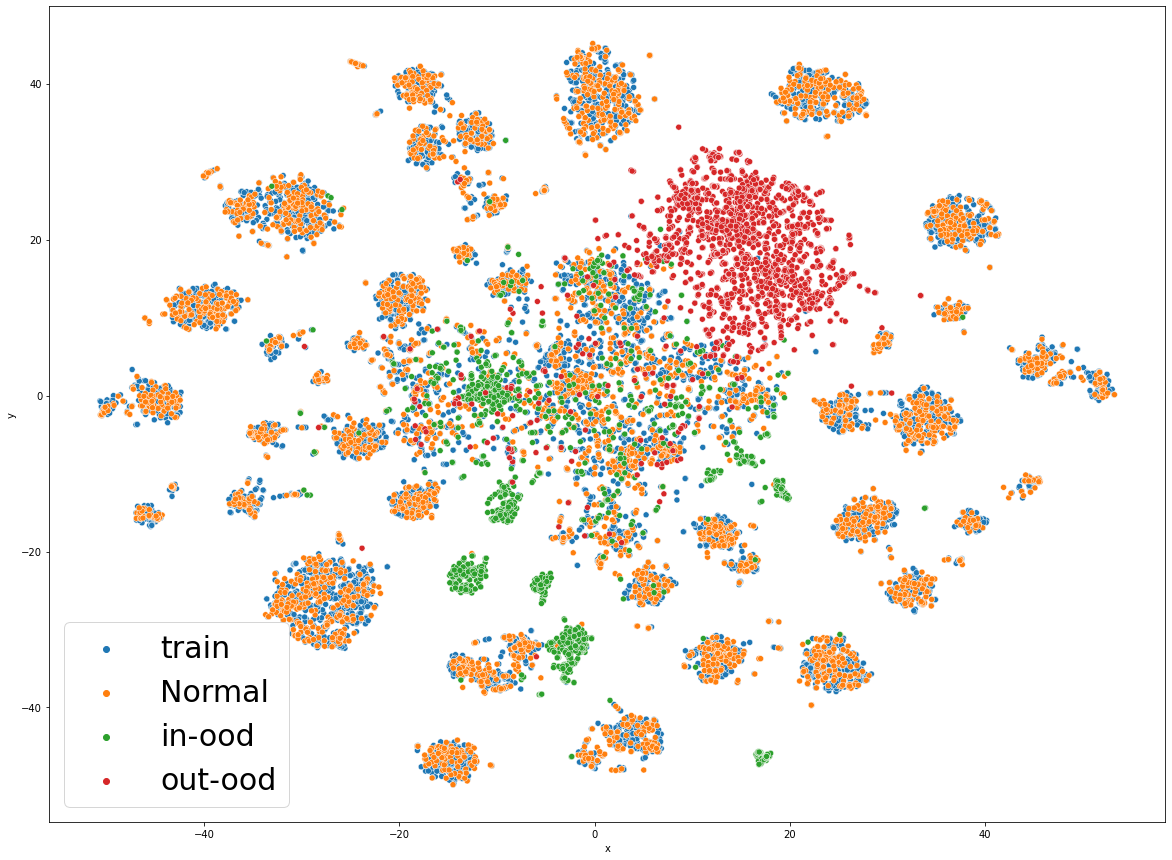

In [483]:
plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = embed, x='x',y="y", hue="label_gt")
plt.legend(fontsize = 30)

In [378]:
def get_scores_multi_cluster(ftrain, ftest, food, ypred, shrunkcov=True):
    xc = [ftrain[ypred == i] for i in np.unique(ypred)]
    if shrunkcov =="lw":
        print("Using ledoit-wolf covariance estimator.")
        cov = np.linalg.pinv(ledoit_wolf(ftrain)[0])
    elif shrunkcov == "emp":
        from sklearn.covariance import EmpiricalCovariance
        cov =  np.linalg.pinv(EmpiricalCovariance().fit(ftrain).covariance_)
    elif shrunkcov == "sh":
        print("sh")
        cov = lambda x:  ShrunkCovariance(shrinkage=0.1).fit(x).covariance_
    elif shrunkcov == "osa":
        print("osa")
        cov = lambda x: OAS().fit(x).covariance_
    else:
        print("nor")
        cov = np.linalg.pinv(np.cov(ftrain.T, bias=True))


    dtrain = [
        np.sum(
            (ftrain - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (ftrain - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]       
    
    din = [
        np.sum(
            (ftest - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (ftest - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]
    dood = [
        np.sum(
            (food - np.mean(x, axis=0, keepdims=True))
            * (
                cov.dot(
                    (food - np.mean(x, axis=0, keepdims=True)).T
                )
            ).T,
            axis=-1,
        )
        for x in xc
    ]
    
    din = np.min(din, axis=0)
    dood = np.min(dood, axis=0)
    dtrain = np.min(dtrain, axis=0)
    return din, dood, dtrain